# SECTION I

In [1]:
emp_id <- c(1,2,3,4)
emp_name <- c('Rick Roy', 'Michelle Smith', 'Ryan Jack', 'Gary Vee')
salary <- c(623.3, 515.2, 611.0, 729.0)
start_date <- c('2012-01-01', '2013-09-23', '2014-11-15', '2014-05-11')
dept <- c('IT', 'Operations', 'IT', 'HR')

start_date = as.Date(start_date, "%Y-%m-%d")

df <- data.frame(emp_id, emp_name, salary, start_date, dept)
str(df)

'data.frame':	4 obs. of  5 variables:
 $ emp_id    : num  1 2 3 4
 $ emp_name  : chr  "Rick Roy" "Michelle Smith" "Ryan Jack" "Gary Vee"
 $ salary    : num  623 515 611 729
 $ start_date: Date, format: "2012-01-01" "2013-09-23" ...
 $ dept      : chr  "IT" "Operations" "IT" "HR"


In [2]:
df[c(2,4),c(3,4)]

,salary,start_date
,<dbl>,<date>
2,515.2,2013-09-23
4,729.0,2014-05-11


In [3]:
df

emp_id,emp_name,salary,start_date,dept
<dbl>,<chr>,<dbl>,<date>,<chr>
1,Rick Roy,623.3,2012-01-01,IT
2,Michelle Smith,515.2,2013-09-23,Operations
3,Ryan Jack,611.0,2014-11-15,IT
4,Gary Vee,729.0,2014-05-11,HR


In [4]:
emp_id <- c(5,6,7)
emp_name <- c('Rasmi', 'Pranab', 'Tushar')
salary <- c(578.0, 722.5, 632.8)
start_date <- c('2013-05-21', '2013-07-30', '2014-06-17')
dept <- c('IT', 'Operations', 'Finance')

start_date = as.Date(start_date, "%Y-%m-%d")

df2 <- data.frame(emp_id, emp_name, salary, start_date, dept)

df <- rbind(df,df2)
df

emp_id,emp_name,salary,start_date,dept
<dbl>,<chr>,<dbl>,<date>,<chr>
1,Rick Roy,623.3,2012-01-01,IT
2,Michelle Smith,515.2,2013-09-23,Operations
3,Ryan Jack,611.0,2014-11-15,IT
4,Gary Vee,729.0,2014-05-11,HR
5,Rasmi,578.0,2013-05-21,IT
6,Pranab,722.5,2013-07-30,Operations
7,Tushar,632.8,2014-06-17,Finance


# SECTION 2

## Q1. Write an R function which plots a histogram as well as a box plot of the feature, passed to that function 

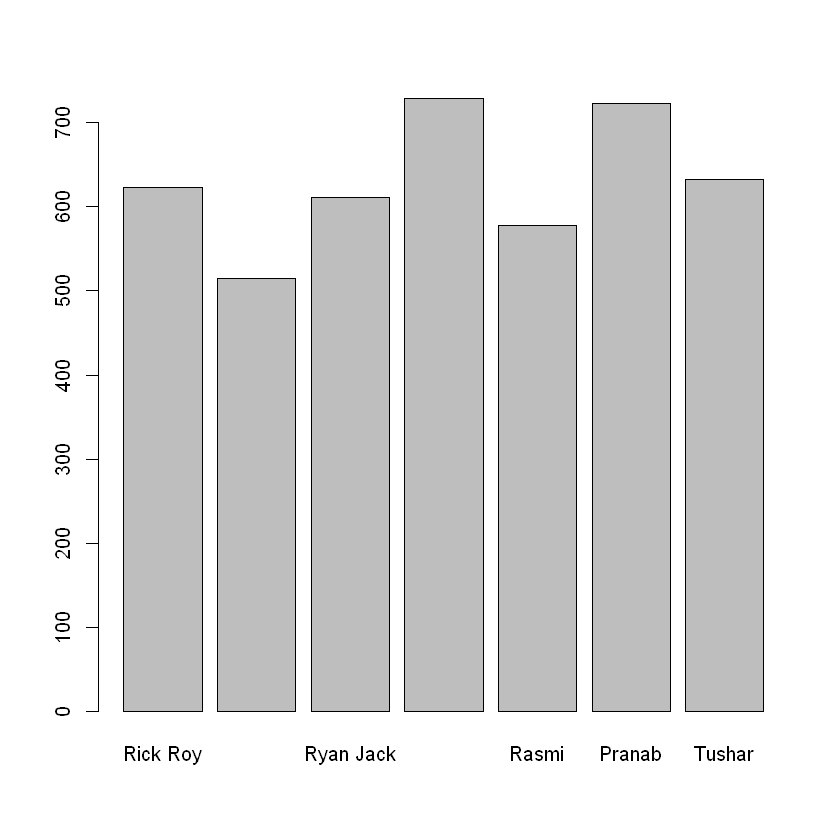

In [5]:
g = function(x, y) {
  barplot(x, names.arg = y)
}

g(df$salary, df$emp_name)

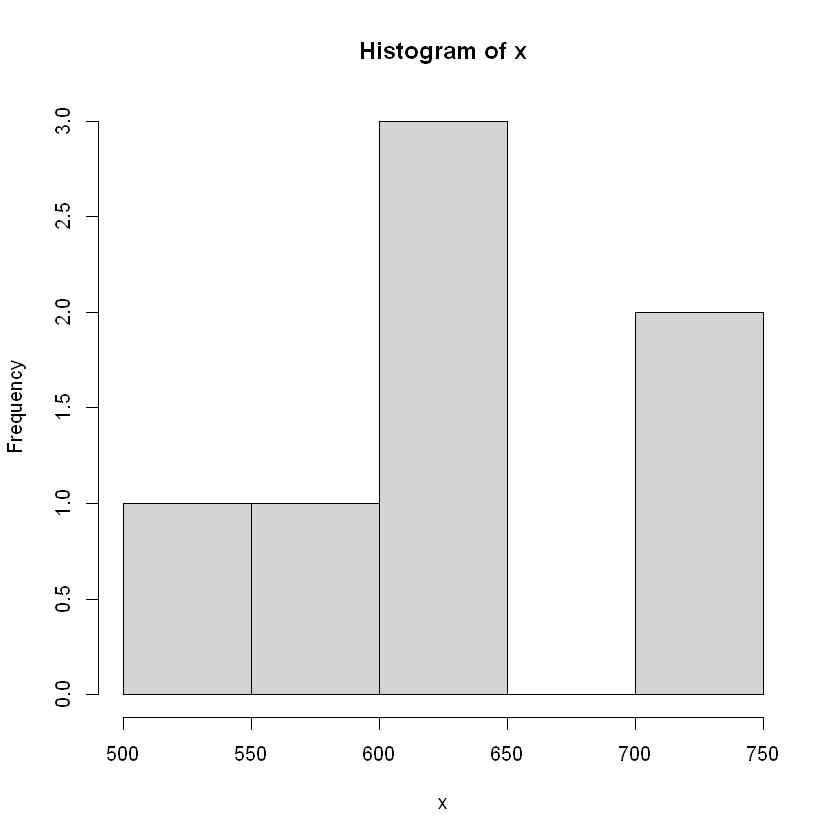

In [6]:
h = function(x) {
  hist(x)
}

h(df$salary)

## Q2. Write an R function that removes outliers from the data using the IQR method

> Test the above function on the ‘Abalone’ dataset provided. Print the names of all the features that have outliers and treat the outliers using the above function.


In [7]:
outlier = function(dataset,x) {
  Q <- quantile(x, probs = c(0.25, 0.75), na.rm = FALSE)
  iqr <- IQR(x)
  up <- Q[2] + 1.5*iqr
  low <- Q[1] - 1.5*iqr
  eliminated <- subset(dataset, x > low & x < up)
  return(eliminated)
}

df = outlier(df, df$salary)
df

,emp_id,emp_name,salary,start_date,dept
,<dbl>,<chr>,<dbl>,<date>,<chr>
1,1,Rick Roy,623.3,2012-01-01,IT
2,2,Michelle Smith,515.2,2013-09-23,Operations
3,3,Ryan Jack,611.0,2014-11-15,IT
4,4,Gary Vee,729.0,2014-05-11,HR
5,5,Rasmi,578.0,2013-05-21,IT
6,6,Pranab,722.5,2013-07-30,Operations
7,7,Tushar,632.8,2014-06-17,Finance


In [8]:
abalone = read.csv("abalone.csv")

### Total rows before IQR

In [9]:
nrow(abalone)

[1] 4177

### Total rows after IQR

In [10]:
newdf = outlier(abalone, abalone$Length)
nrow(newdf)

[1] 4128

## Q3. Create a pie chart using ggplot to check the distribution of the ‘Sex’ feature from the **‘abalone’** dataset

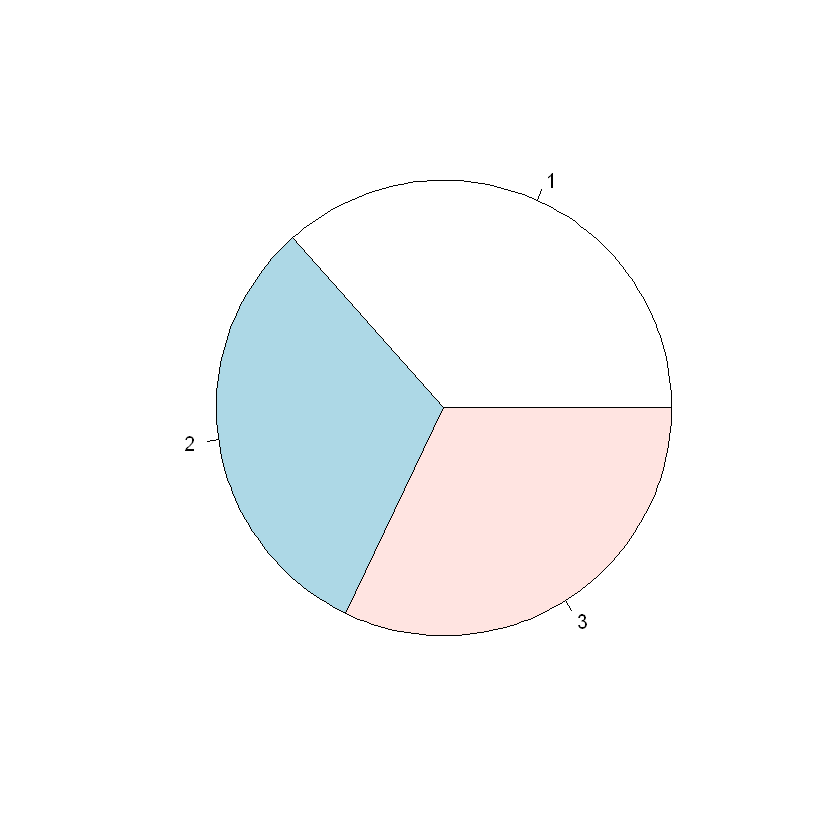

In [11]:
x = c(nrow(abalone[abalone$Sex == 'M',]),nrow(abalone[abalone$Sex == 'F',]),nrow(abalone[abalone$Sex == 'I',]))

pie(x)

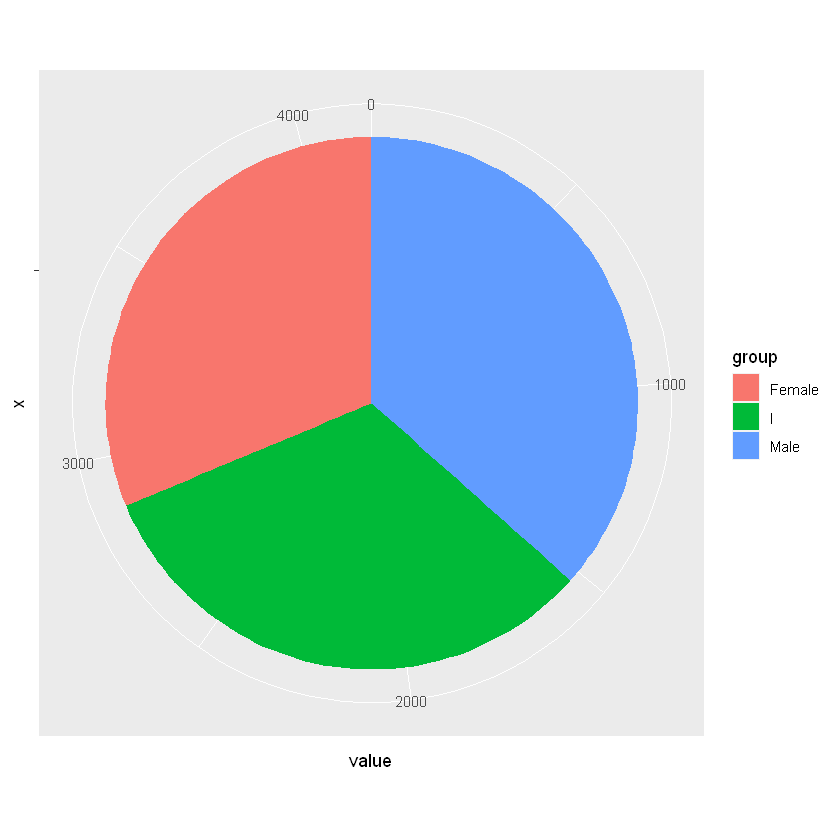

In [12]:
library(ggplot2)

df <- data.frame(
  group = c('Male', "Female", "I"),
  value = x
)

bp<- ggplot(df, aes(x="", y=value, fill=group))+
  geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start=0)
pie

# SECTION 3

## Q1. Establish the connection with given “data1.sqllite” database and convert all the tables into R dataframe

In [13]:
library("RSQLite")
con <- dbConnect(drv=RSQLite::SQLite(), dbname="data1.sqlite")

In [14]:
tables <- dbListTables(con)
tables <- tables[tables != "sqlite_sequence"]

In [15]:
lDataFrames <- vector("list", length=length(tables))

In [16]:
for (i in seq(along=tables)) {
  lDataFrames[[i]] <- dbGetQuery(conn=con, statement=paste("SELECT * FROM '", tables[[i]], "'", sep=""))
}

In [17]:
customers = as.data.frame(lDataFrames[1])
employees = as.data.frame(lDataFrames[2])
offices = as.data.frame(lDataFrames[3])
orderdetails = as.data.frame(lDataFrames[4])
orders = as.data.frame(lDataFrames[5])
payments = as.data.frame(lDataFrames[6])
productlines = as.data.frame(lDataFrames[7])
products = as.data.frame(lDataFrames[8])

In [18]:
library(sqldf)

Loading required package: gsubfn

Loading required package: proto



## Q2. Get the list of customers whose sales representatives reside in New York using SQL query in the appropriate R function

In [21]:
orders$orderNumber = as.integer(orders$orderNumber)
orderdetails$orderNumber = as.integer(orderdetails$orderNumber)

In [24]:
head(sqldf("select * from customers where city = 'NYC'"))

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,131,Land of Toys Inc.,Lee,Kwai,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,1323,114900.00
2,151,Muscle Machine Inc,Young,Jeff,2125557413,4092 Furth Circle,Suite 400,NYC,NY,10022,USA,1286,138500.00
3,181,Vitachrome Inc.,Frick,Michael,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,1286,76400.00
4,424,Classic Legends Inc.,Hernandez,Maria,2125558493,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,1286,67500.00
5,456,Microscale Inc.,Choi,Yu,2125551957,5290 North Pendale Street,Suite 200,NYC,NY,10022,USA,1286,39800.00


## Q3. Get order details whose amount is more than 50,000 and got Shipped using SQL query in the appropriate R function

In [25]:
head(sqldf("select * from orders inner join orderdetails on orders.orderNumber = orderdetails.orderNumber where status= 'Shipped'"))

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,,363,10100,S18_1749,30,136.00,3
2,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,,363,10100,S18_2248,50,55.09,2
3,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,,363,10100,S18_4409,22,75.46,4
4,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,,363,10100,S24_3969,49,35.29,1
5,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128,10101,S18_2325,25,108.06,4
6,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128,10101,S18_2795,26,167.06,1


## Q4. Get customers who placed orders and plot a bar chart that displays the number of orders from customer ids

In [41]:
h = (sqldf("select orders.customerNumber, count(orders.customerNumber) as c from customers inner join orders on orders.customerNumber = customers.customerNumber group by orders.customerNumber"))

In [43]:
v = as.integer(h$c)
l = as.vector(h$customerNumber)

customer.number = h[h$c == max(h$c),1]
print(paste("The customer with customer number :", customer.number, "has maximum number of orders with:", h[h$c == max(h$c),2], 'orders'))

[1] "The customer with customer number : 141 has maximum number of orders with: 26 orders"


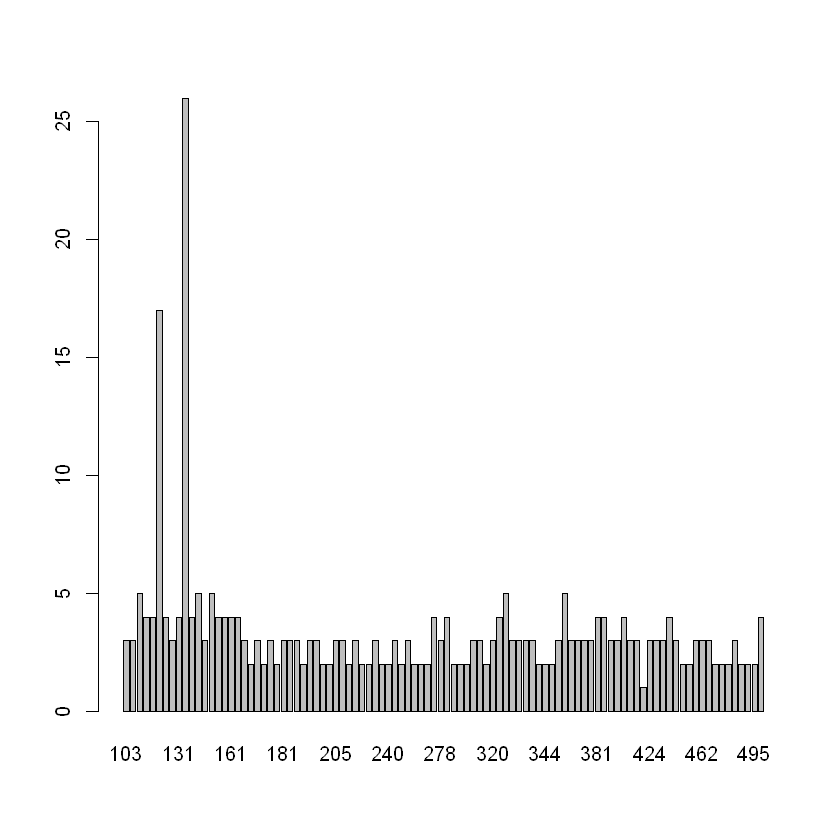

In [28]:
barplot(v, names.arg = l)

## Q5. Check how many orders got shipped using bar chart as well pie chart

In [29]:
h = (sqldf("select status,count(status) as c from orders group by status"))

In [30]:
v = as.integer(h$c)
l = as.vector(h$status)

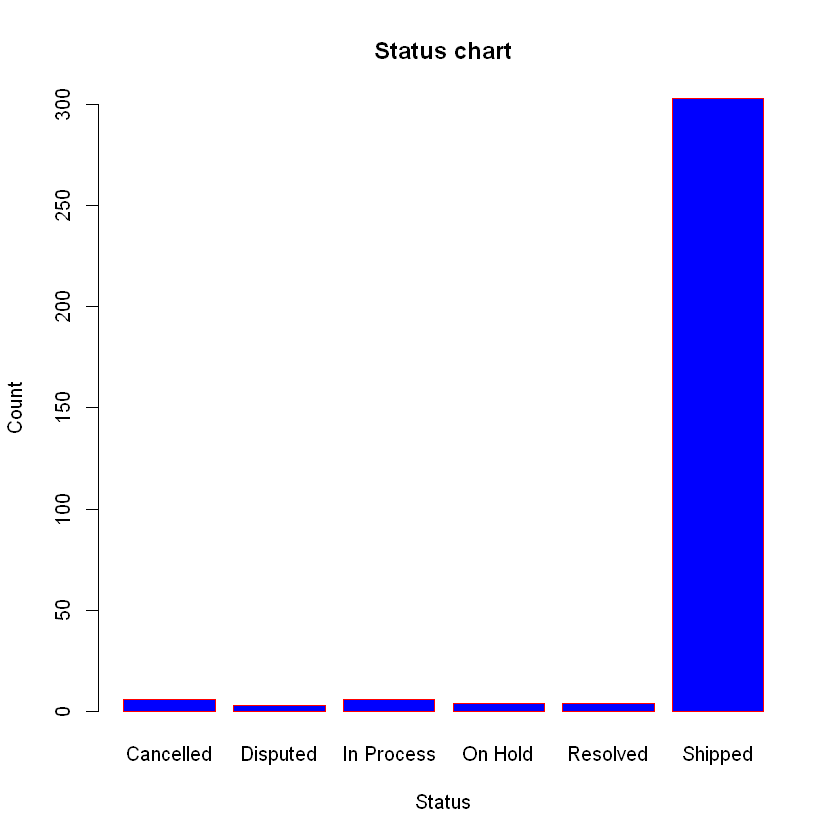

In [31]:
barplot(v, names.arg = l, xlab="Status",ylab="Count",col="blue",
        main="Status chart",border="red")

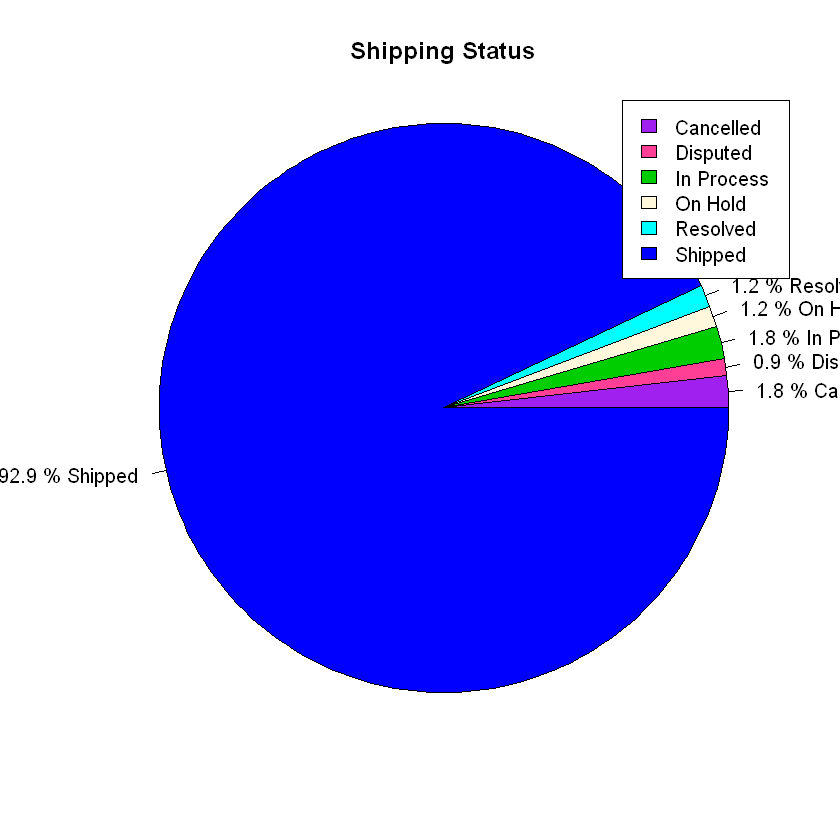

In [32]:
piepercent=round(100*v/sum(v),1)
pie(v,labels=paste(piepercent,"%", l),col=c("purple", "violetred1", "green3","cornsilk", "cyan", "blue"),radius=1.0,main="Shipping Status",clockwise = FALSE)
legend("topright", l, fill=c("purple", "violetred1", "green3","cornsilk", "cyan", "blue"))

## Q6. Plot a pie chart that shows the different types of products that are on sale and find out the product that is sold on a large scale as compared to other products

In [33]:
h = (sqldf("select orderdetails.productCode as o, count(orderdetails.productCode) as c from products inner join orderdetails on orderdetails.productCode = products.productCode group by orderdetails.productCode"))

In [34]:
v = as.integer(h$c)
l = as.vector(h$o)

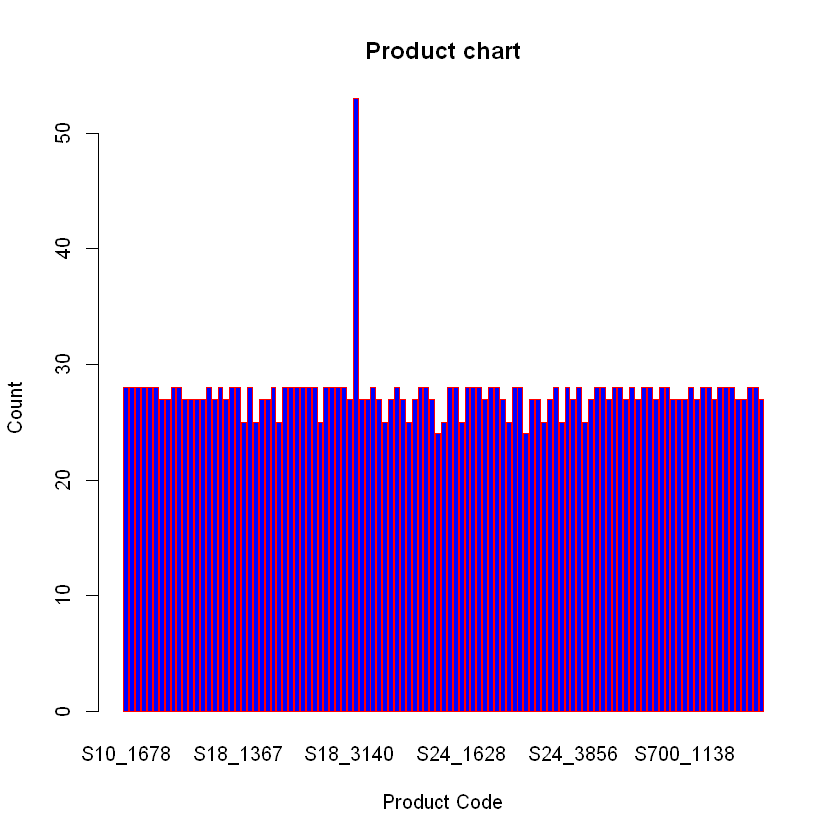

In [35]:
barplot(v, names.arg = l, xlab="Product Code",ylab="Count",col="blue",main="Product chart",border="red")

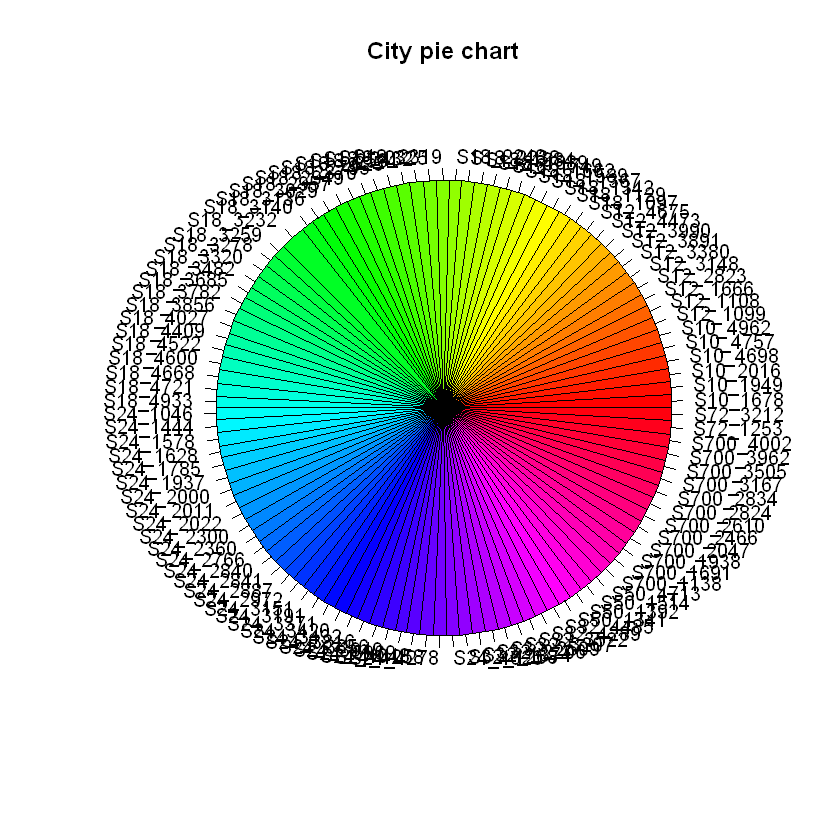

In [36]:
pie(v, l, main = "City pie chart", col = rainbow(length(v)))

In [39]:
product.code = h[h$c == max(h$c),'o']
print(paste("The product with product code :", product.code, "has maximum number of orders with:", h[h$c == max(h$c),'c'], 'orders'))

[1] "The product with product code : S18_3232 has maximum number of orders with: 53 orders"
